Практическая работа #2 
Первичная обоработка данных
Соловьев Александр КИ22-16/1Б

Для начала работы нам необходимо подключить все необходимые библиотеки и саму таблицу

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

In [82]:
table = pd.read_excel('first_practice_dataframe.xlsx')
# VARIANT 22
data = table[['cat4_income', 'cat1_gender', 'num1_2', 'num2_2', 'num3_2']]
data

,cat4_income,cat1_gender,num1_2,num2_2,num3_2
0,"$40,001 - $50,000",male,-14.598769,1214.497070,596.064809
1,"$40,001 - $50,000",male,-69.133822,1233.147326,615.696315
2,"$40,001 - $50,000",male,17.067071,727.722126,388.723422
3,"Below $30,001",NaN,-94.791767,256.056205,716.548786
4,-,male,33.123237,633.327645,28.94715
...,...,...,...,...,...
995,"$30,001 - $40,000",male,-39.362809,665.078120,215.147513
996,"Below $30,001",male,78.331150,823.791797,487.893277
997,"$30,001 - $40,000",male,1.752885,563.180027,736.435882
998,"Below $30,001",NaN,-63.513066,1342.511477,218.142911


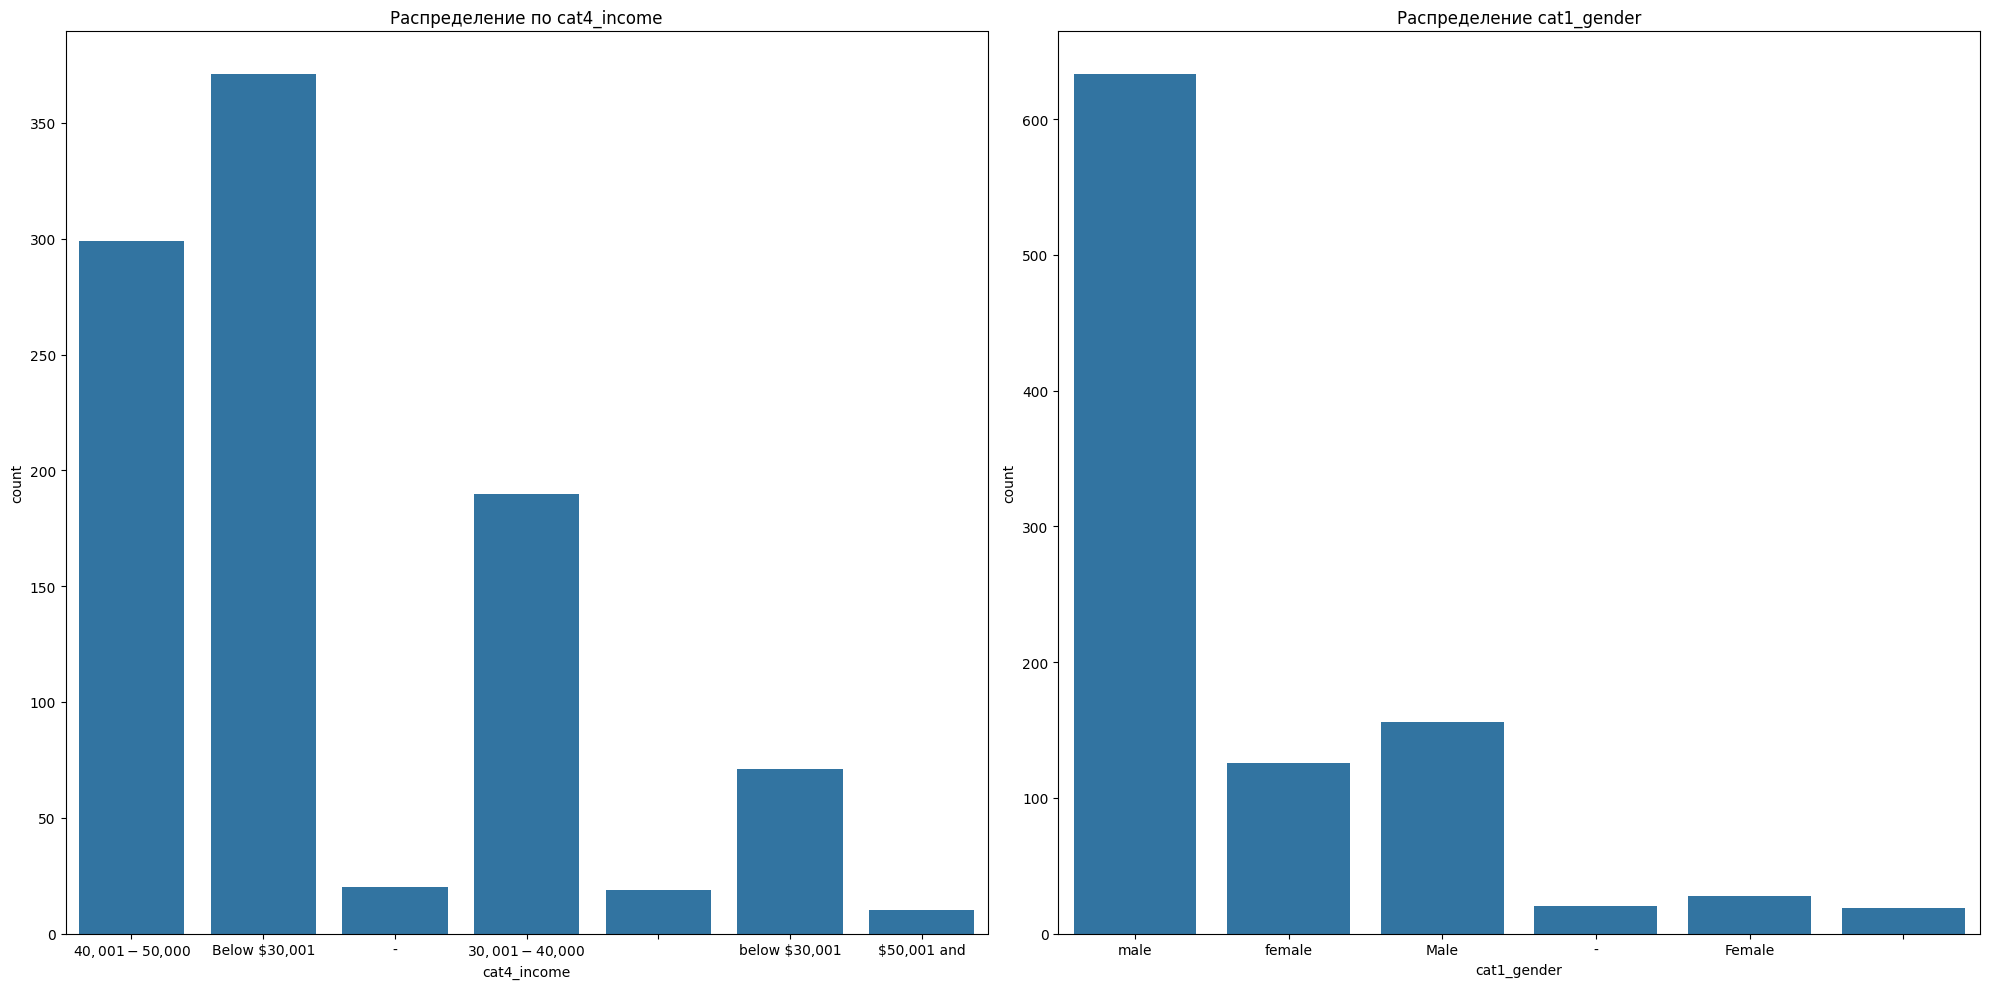

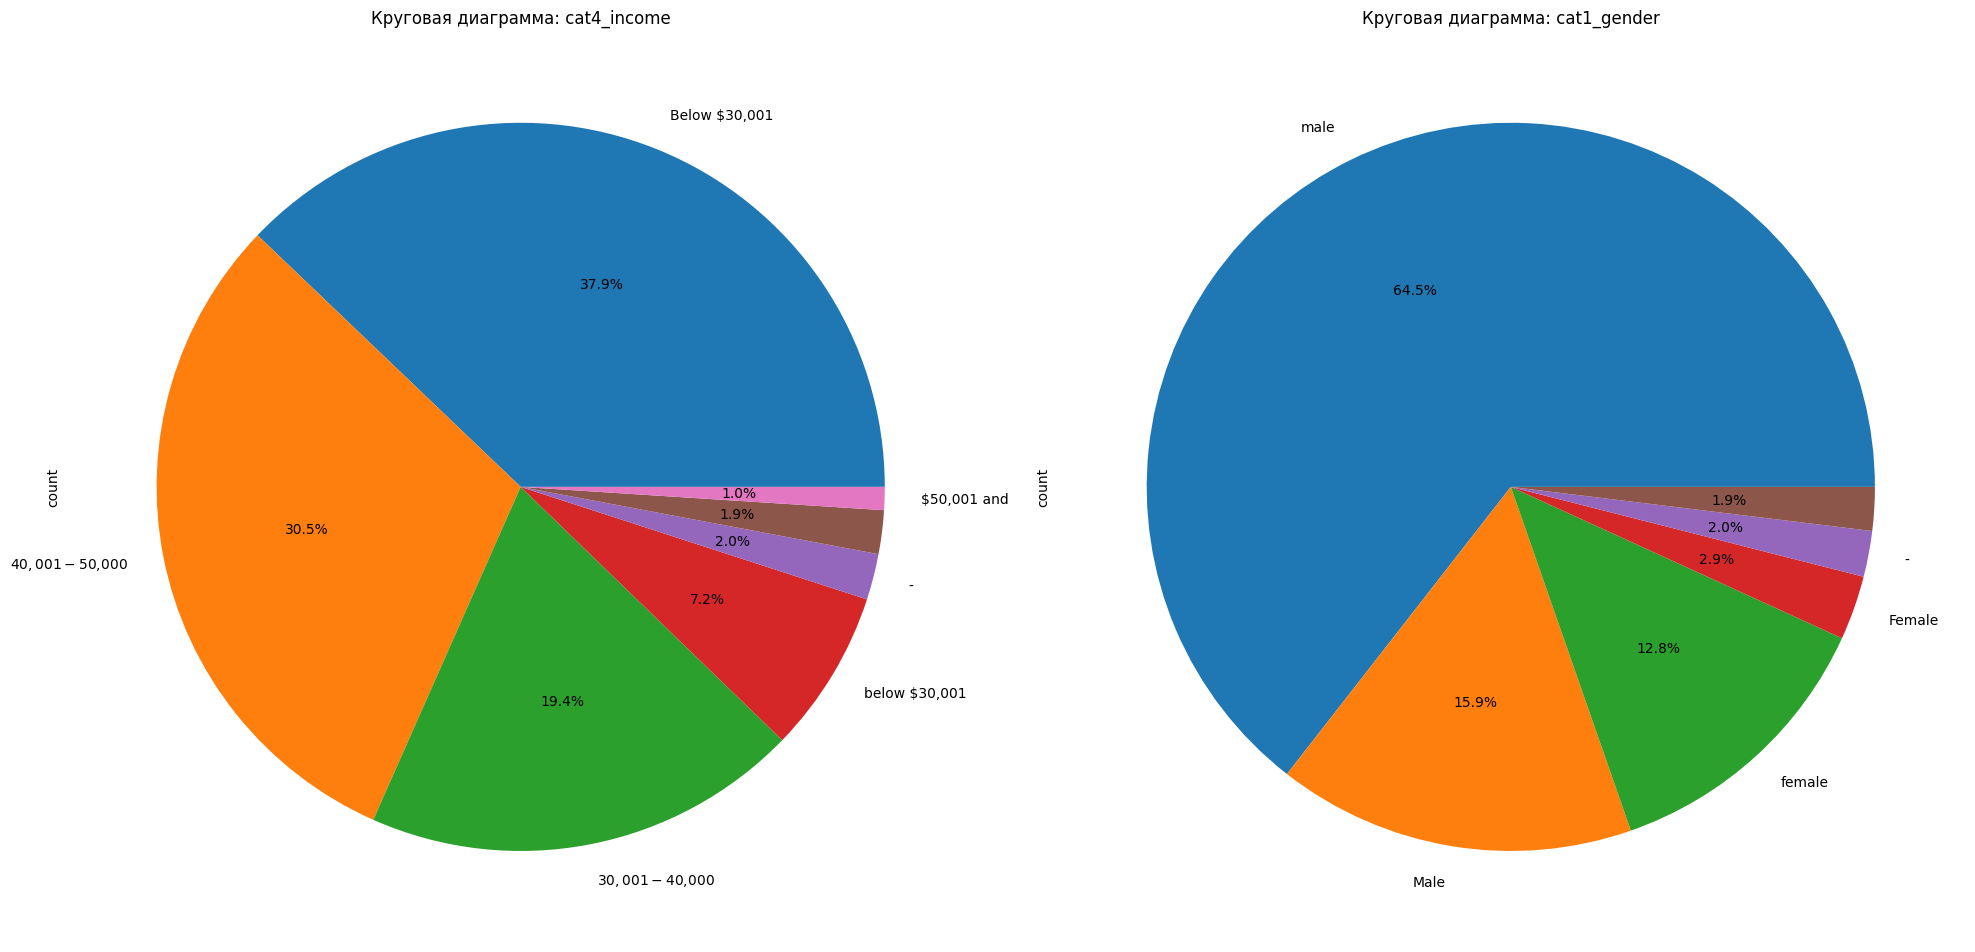

In [83]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(x='cat4_income', data=data)
plt.title('Распределение по cat4_income')
plt.subplot(1, 2, 2)
sns.countplot(x='cat1_gender', data=data)
plt.title('Распределение cat1_gender')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
data['cat4_income'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Круговая диаграмма: cat4_income')
plt.subplot(1, 2, 2)
data['cat1_gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Круговая диаграмма: cat1_gender')
plt.tight_layout()
plt.show()

Так как у одной таблицы есть значения, которые нельзя прочитать и вывести на диаграмме, нам нужно их найти и заменить на NaN

In [84]:
data_errs = data['num1_2']
data_errs.value_counts(dropna=False)

num1_2
-9999.000000    50
-44.531704       1
 21.076678       1
-36.934262       1
-130.560068      1
                ..
-39.362809       1
 78.331150       1
 1.752885        1
-63.513066       1
 32.451084       1
Name: count, Length: 951, dtype: int64

In [85]:
data_errs = data['num2_2']
data_errs.value_counts(dropna=False)

num2_2
NaN            50
1711.424906     1
930.150617      1
64.461806       1
1016.371622     1
               ..
665.078120      1
823.791797      1
563.180027      1
1342.511477     1
382.629129      1
Name: count, Length: 951, dtype: int64

In [86]:
data_errs = data['num3_2']
data_errs.value_counts(dropna=False)

num3_2
              30
-             30
NaN           25
227.03222      1
472.520189     1
              ..
215.147513     1
487.893277     1
736.435882     1
218.142911     1
291.597901     1
Name: count, Length: 918, dtype: int64

C:\Users\sh764\AppData\Local\Temp\ipykernel_1772\535640891.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  edited_data['num3_2'] = edited_data['num3_2'].replace([' ','-'], np.nan, regex=True)


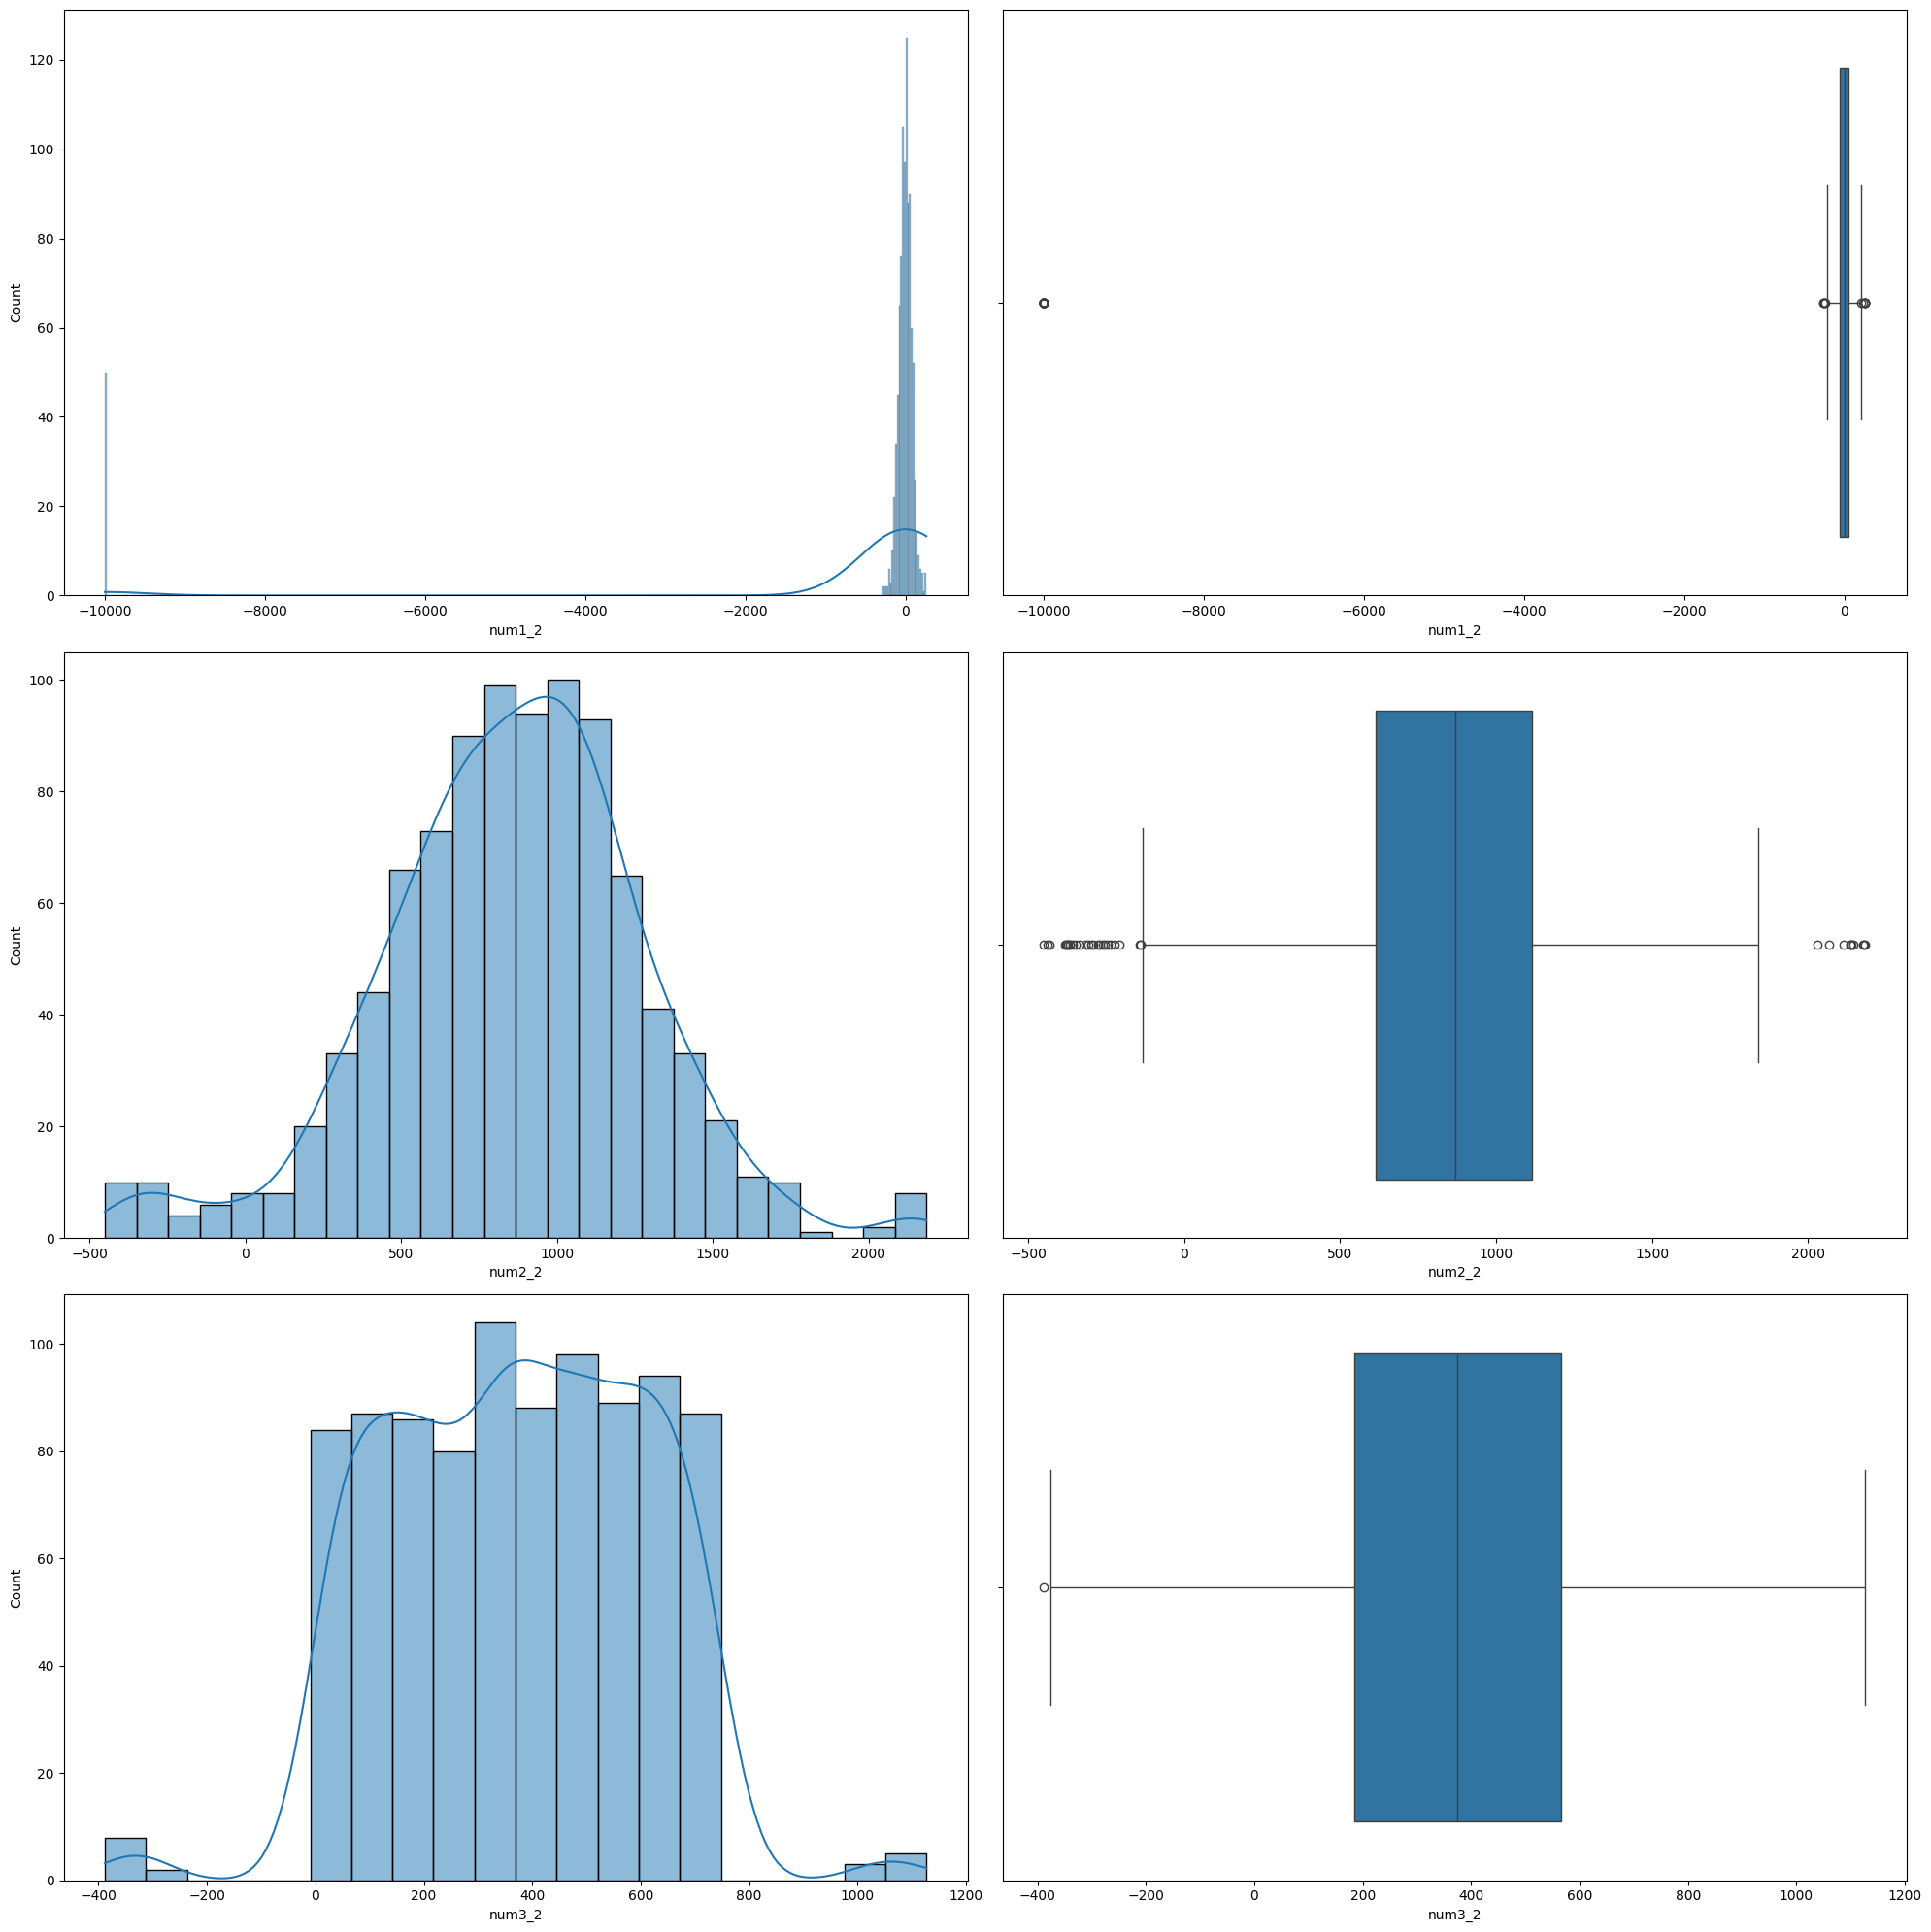

In [87]:
edited_data = data.copy(deep=True)
edited_data['num3_2'] = edited_data['num3_2'].replace([' ','-'], np.nan, regex=True)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
columns = ['num1_2', 'num2_2', 'num3_2']
axes_iterator = iter(axes.flatten())

for column in columns:
    sns.histplot(data=edited_data, x=column, kde=True, ax=next(axes_iterator))
    sns.boxplot(x=edited_data[column], ax=next(axes_iterator))

plt.tight_layout()
plt.show()

Теперь нам нужно сделать проверку правдоподобности данных

In [88]:

cdata = data.copy(deep=True)

print(cdata)

# Приведение категориальных данных к верхнему регистру
cdata['cat4_income'] = cdata['cat4_income'].str.upper()
# Удаление знака доллара, пробелов и запятых
cdata['cat4_income'] = cdata['cat4_income'].str.replace(r'[\$, ]', '', regex=True)

# Определим допустимые категории для cat4_income
valid_income_categories = [
    'BELOW30001', 
    '30001-40000', 
    '40001-50000', 
    '50001-60000'
]

cdata['cat1_gender'] = cdata['cat1_gender'].str.upper()


valid_gender_categories = ['MALE', 'FEMALE']

# Замена некорректных значений в cat4_income
cdata.loc[~cdata['cat4_income'].isin(valid_income_categories), 'cat4_income'] = np.nan

# Замена некорректных значений в cat1_gender
cdata.loc[~cdata['cat1_gender'].isin(valid_gender_categories), 'cat1_gender'] = np.nan

# Замена некорректных значений в числовых столбцах
for col in ['num1_2', 'num2_2', 'num3_2']:
    # Замена строк и других некорректных значений на NaN
    cdata[col] = pd.to_numeric(cdata[col], errors='coerce')

print(cdata)

            cat4_income cat1_gender     num1_2       num2_2      num3_2
0     $40,001 - $50,000        male -14.598769  1214.497070  596.064809
1     $40,001 - $50,000        male -69.133822  1233.147326  615.696315
2     $40,001 - $50,000        male  17.067071   727.722126  388.723422
3         Below $30,001         NaN -94.791767   256.056205  716.548786
4                     -        male  33.123237   633.327645    28.94715
..                  ...         ...        ...          ...         ...
995  $30,001 - $40,000         male -39.362809   665.078120  215.147513
996       Below $30,001        male  78.331150   823.791797  487.893277
997  $30,001 - $40,000         male   1.752885   563.180027  736.435882
998       Below $30,001         NaN -63.513066  1342.511477  218.142911
999       Below $30,001        male   3.026172  1082.727767  697.609784

[1000 rows x 5 columns]
     cat4_income cat1_gender     num1_2       num2_2      num3_2
0    40001-50000        MALE -14.598769  1214.

In [89]:
# Определяем порог для сигм
threshold = 3

# Применяем метод сигм
c, low, upp = sc.stats.sigmaclip(cdata['num1_2'].dropna(), threshold, threshold)
data_cleaned_sigma = cdata[(cdata['num1_2'] >= low) & (cdata['num1_2'] <= upp)]
# Метод квартилей
def remove_outliers_iqr(cdata, column):
    Q1 = cdata[column].quantile(0.25)
    Q3 = cdata[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - IQR
    upper_bound = Q3 + IQR
    return cdata[(cdata[column] >= lower_bound) & (cdata[column] <= upper_bound)]

data_cleaned_iqr = remove_outliers_iqr(cdata, 'num1_2')

print('sigma\n', data_cleaned_sigma)
print('IQR\n', data_cleaned_iqr)

sigma
      cat4_income cat1_gender     num1_2       num2_2      num3_2
0    40001-50000        MALE -14.598769  1214.497070  596.064809
1    40001-50000        MALE -69.133822  1233.147326  615.696315
2    40001-50000        MALE  17.067071   727.722126  388.723422
3     BELOW30001         NaN -94.791767   256.056205  716.548786
4            NaN        MALE  33.123237   633.327645   28.947150
..           ...         ...        ...          ...         ...
995  30001-40000        MALE -39.362809   665.078120  215.147513
996   BELOW30001        MALE  78.331150   823.791797  487.893277
997  30001-40000        MALE   1.752885   563.180027  736.435882
998   BELOW30001         NaN -63.513066  1342.511477  218.142911
999   BELOW30001        MALE   3.026172  1082.727767  697.609784

[939 rows x 5 columns]
IQR
      cat4_income cat1_gender     num1_2       num2_2      num3_2
0    40001-50000        MALE -14.598769  1214.497070  596.064809
1    40001-50000        MALE -69.133822  1233.147326  

Поиск и востановлениие значений

In [90]:
# Сброс индекса и копирование данных
data_cleaned_sigma.reset_index(drop=True, inplace=True)
cdata = data_cleaned_sigma.copy()

# Замена некорректных значений в cat4_income
valid_income_categories = ['BELOW30001', '30001-40000', '40001-50000', '50001-60000']
cdata.loc[~cdata['cat4_income'].isin(valid_income_categories), 'cat4_income'] = np.nan

# Закодируем cat4_income в числовой формат
label_encoder = LabelEncoder()
cdata['cat4_income_encoded'] = label_encoder.fit_transform(cdata['cat4_income'])

# Применяем KNNImputer для восстановления пропусков
imputer = KNNImputer(n_neighbors=5)  # Используем 5 ближайших соседей
cdata['cat4_income_encoded'] = imputer.fit_transform(cdata[['cat4_income_encoded']])

# Обратно преобразуем числовые значения в категориальные
cdata['cat4_income'] = label_encoder.inverse_transform(cdata['cat4_income_encoded'].astype(int))

# Удаляем временный столбец с закодированными значениями
cdata.drop(columns=['cat4_income_encoded'], inplace=True)

# Замена оставшихся пропусков в cat4_income самым популярным значением
if not cdata['cat4_income'].mode().empty:  # Проверяем, есть ли мода
    cdata['cat4_income'] = cdata['cat4_income'].fillna(cdata['cat4_income'].mode()[0])
else:
    cdata['cat4_income'] = cdata['cat4_income'].fillna('UNKNOWN')  # Заполняем значением по умолчанию

# Замена пропущенных значений самым популярным значением для второго признака (cat1_gender)
if not cdata['cat1_gender'].mode().empty:  # Проверяем, есть ли мода
    cdata['cat1_gender'] = cdata['cat1_gender'].fillna(cdata['cat1_gender'].mode()[0])
else:
    cdata['cat1_gender'] = cdata['cat1_gender'].fillna('UNKNOWN')  # Заполняем значением по умолчанию

# Замена пропущенных значений средним значением для третьего признака (num1_2)
cdata['num1_2'] = cdata['num1_2'].fillna(cdata['num1_2'].mean())

# Замена пропущенных значений медианой для четвертого признака (num2_2)
cdata['num2_2'] = cdata['num2_2'].fillna(cdata['num2_2'].median())

# K ближайших соседей для пятого признака (num3_2)
cdata['num3_2'] = imputer.fit_transform(cdata[['num3_2']])

# Вывод результата
print("Данные после восстановления пропусков:")
print(cdata)

# Статистика по пропускам
print("\nСтатистика по пропускам:")
print(cdata.isnull().sum())

Данные после восстановления пропусков:
     cat4_income cat1_gender     num1_2       num2_2      num3_2
0    40001-50000        MALE -14.598769  1214.497070  596.064809
1    40001-50000        MALE -69.133822  1233.147326  615.696315
2    40001-50000        MALE  17.067071   727.722126  388.723422
3     BELOW30001        MALE -94.791767   256.056205  716.548786
4     BELOW30001        MALE  33.123237   633.327645   28.947150
..           ...         ...        ...          ...         ...
934  30001-40000        MALE -39.362809   665.078120  215.147513
935   BELOW30001        MALE  78.331150   823.791797  487.893277
936  30001-40000        MALE   1.752885   563.180027  736.435882
937   BELOW30001        MALE -63.513066  1342.511477  218.142911
938   BELOW30001        MALE   3.026172  1082.727767  697.609784

[939 rows x 5 columns]

Статистика по пропускам:
cat4_income    0
cat1_gender    0
num1_2         0
num2_2         0
num3_2         0
dtype: int64


Преобразование данных

In [91]:
# Стандартизация и нормализация числовых признаков
scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()

cdata[['num1_2', 'num2_2', 'num3_2']] = scaler.fit_transform(cdata[['num1_2', 'num2_2', 'num3_2']])
cdata[['num1_2', 'num2_2', 'num3_2']] = minmax_scaler.fit_transform(cdata[['num1_2', 'num2_2', 'num3_2']])

# One-hot encoding для категориального признака cat4_income
cat14_encoded = one_hot_encoder.fit_transform(cdata[['cat4_income']]).toarray()
cdata['cat4_income'] = cat14_encoded

# Label encoding для категориального признака cat1_gender
cdata['cat1_gender'] = label_encoder.fit_transform(cdata['cat1_gender'])

cdata

,cat4_income,cat1_gender,num1_2,num2_2,num3_2
0,0.0,1,0.466147,0.631951,0.649636
1,0.0,1,0.339655,0.639026,0.662590
2,0.0,1,0.539594,0.447275,0.512816
3,0.0,1,0.280143,0.268332,0.729140
4,0.0,1,0.576836,0.411463,0.275408
...,...,...,...,...,...
934,1.0,1,0.408708,0.423509,0.398277
935,0.0,1,0.681694,0.483723,0.578256
936,1.0,1,0.504074,0.384850,0.742263
937,0.0,1,0.352692,0.680517,0.400254
